# Ames LOWA Housing Data [Kaggle](https://www.kaggle.com/datasets/marcopale/housing)
#### for Regression Models

# Fisrt Task in Machine learning about linear regression

1- you have two files train.csv and test.csv

2- you have two read two files and do data preprocessing as you see 

3- apply colleration between features and output , the biggest feaure having correlation with output

4- you do simple regression between this feature and output

5- apply multiple linear regression

6- apply lasso and ridge regression

7- report results and comparsion between different models and which one give you best result

8- evaluation metrics : MSE , RMSE , R2 score , MAE

9- last one : advanced --> deploy model with best results using streamlit library to take input from user and apply result on website

10 - notice : input of model may be one feature or more than one feature based on waht ? based on best model give you best r2_score


In [143]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, boxcox


from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso , Ridge ,LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

%matplotlib inline

In [85]:
df = pd.read_csv('AmesHousing.csv')
print("Dataset shape: ", df.shape)
df.head()

Dataset shape:  (2930, 82)


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [86]:
# summary for numerical values
df.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [87]:
# summary for categorical values
df.describe(include=['object'])

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition
count,2930,2930,198,2930,2930,2930,2930,2930,2930,2930,...,2773,2771,2771,2771,2930,13,572,106,2930,2930
unique,7,2,2,4,4,3,5,3,28,9,...,6,3,5,5,3,4,4,5,10,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
freq,2273,2918,120,1859,2633,2927,2140,2789,443,2522,...,1731,1231,2615,2665,2652,4,330,95,2536,2413


In [88]:
pd.set_option('display.max_columns', None)
df.info()
pd.reset_option('display.max_columns')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [89]:
df = df.drop(columns=['PID','Order'])   # Features that doesn't add meaning for predecting the output

### Handle Null values

In [90]:
# Store the initial shape of the dataset
initial_shape = df.shape

# Print the initial shape of the dataset
print(f"Initial Shape of the Dataset: {initial_shape}")

# Calculate the percentage of null values
null_percentage = (df.isna().sum() / len(df)) * 100

# Track the number of imputed values for each column
imputed_info = {}

# Imputation and tracking
for col, perc in null_percentage.items():
    if perc > 0:
        # Store initial count of missing values
        initial_missing_count = df[col].isna().sum()
        
        # Initialize dictionary to store imputation info
        imputed_info[col] = {'percentage': perc, 'method': None, 'imputed_count': None}
        
        if perc < 5:
            if df[col].dtype in ['float64', 'int64']:
                # Impute numerical features with median
                df[col].fillna(df[col].median(), inplace=True)
                imputed_info[col]['method'] = 'Median'
            else:
                # Impute categorical features with mode
                df[col].fillna(df[col].mode()[0], inplace=True)
                imputed_info[col]['method'] = 'Mode'
                
        elif 5 <= perc <= 30:
            if df[col].dtype in ['float64', 'int64']:
                # Impute numerical features with median
                df[col].fillna(df[col].median(), inplace=True)
                imputed_info[col]['method'] = 'Median'
            else:
                # Impute categorical features with mode
                df[col].fillna(df[col].mode()[0], inplace=True)
                imputed_info[col]['method'] = 'Mode'

        elif perc > 30:
            # Drop the column from the DataFrame
            df.drop(columns=[col], inplace=True)
            imputed_info[col]['method'] = 'Dropped'
            continue  # Skip to the next column

        # Calculate the number of imputed values
        imputed_info[col]['imputed_count'] = initial_missing_count - df[col].isna().sum()

# Store the shape of the dataset after dropping columns
shape_after_dropping = df.shape

# Print the shape of the dataset after dropping columns
print(f"Shape of the Dataset After Dropping Columns: {shape_after_dropping}")

# Store the shape of the dataset after imputing values
shape_after_imputing = df.shape

# Print the shape of the dataset after imputing values
print(f"Shape of the Dataset After Imputing Values: {shape_after_imputing}")
print('-'*100)

# Calculate the percentage of rows imputed for each column
total_rows = initial_shape[0]
for col, info in imputed_info.items():
    if info['method'] == 'Dropped':
        info['percentage_imputed'] = 0
    else:
        percentage_imputed = (info['imputed_count'] / total_rows) * 100
        info['percentage_imputed'] = percentage_imputed

# Print the imputation information
print("Imputation Information:")
for col, info in imputed_info.items():
    print(f"Column: {col}")
    print(f"  Percentage of Missing Values: {info['percentage']}%")
    print(f"  Method: {info['method']}")
    if info['method'] != 'Dropped':
        print(f"  Percentage of Rows Imputed: {info['percentage_imputed']}%")
    print('-'*100)


Initial Shape of the Dataset: (2930, 80)
Shape of the Dataset After Dropping Columns: (2930, 74)
Shape of the Dataset After Imputing Values: (2930, 74)
----------------------------------------------------------------------------------------------------
Imputation Information:
Column: Lot Frontage
  Percentage of Missing Values: 16.723549488054605%
  Method: Median
  Percentage of Rows Imputed: 16.723549488054605%
----------------------------------------------------------------------------------------------------
Column: Alley
  Percentage of Missing Values: 93.24232081911262%
  Method: Dropped
----------------------------------------------------------------------------------------------------
Column: Mas Vnr Type
  Percentage of Missing Values: 60.580204778157%
  Method: Dropped
----------------------------------------------------------------------------------------------------
Column: Mas Vnr Area
  Percentage of Missing Values: 0.7849829351535836%
  Method: Median
  Percentage of Row

In [91]:
df.duplicated().sum()

0

### Numerical and Categorical definition 

In [92]:
cat_cols = df.select_dtypes(include = 'O').columns.tolist()
cat_cols

['MS Zoning',
 'Street',
 'Lot Shape',
 'Land Contour',
 'Utilities',
 'Lot Config',
 'Land Slope',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Exter Qual',
 'Exter Cond',
 'Foundation',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin Type 2',
 'Heating',
 'Heating QC',
 'Central Air',
 'Electrical',
 'Kitchen Qual',
 'Functional',
 'Garage Type',
 'Garage Finish',
 'Garage Qual',
 'Garage Cond',
 'Paved Drive',
 'Sale Type',
 'Sale Condition']

In [93]:
for column in cat_cols:
    print(f"Unique Values in {column} column is:",df[column].unique())
    print("-"*100,"\n")

Unique Values in MS Zoning column is: ['RL' 'RH' 'FV' 'RM' 'C (all)' 'I (all)' 'A (agr)']
---------------------------------------------------------------------------------------------------- 

Unique Values in Street column is: ['Pave' 'Grvl']
---------------------------------------------------------------------------------------------------- 

Unique Values in Lot Shape column is: ['IR1' 'Reg' 'IR2' 'IR3']
---------------------------------------------------------------------------------------------------- 

Unique Values in Land Contour column is: ['Lvl' 'HLS' 'Bnk' 'Low']
---------------------------------------------------------------------------------------------------- 

Unique Values in Utilities column is: ['AllPub' 'NoSewr' 'NoSeWa']
---------------------------------------------------------------------------------------------------- 

Unique Values in Lot Config column is: ['Corner' 'Inside' 'CulDSac' 'FR2' 'FR3']
-----------------------------------------------------------------

### Transform Categorical Data

In [94]:
# Most of our Categorical Features are Ordinal -> Label Encoder
label_encoder = LabelEncoder()
cat_cols = df.select_dtypes(include=['object'])
df_12 = df
for col in cat_cols:
    df_12[col] = label_encoder.fit_transform(df[col])


# Check if all columns are numerical
are_all_numerical = all(df_12.dtypes.apply(lambda x: pd.api.types.is_numeric_dtype(x)))
print(f"\nAre all columns numerical? {'Yes' if are_all_numerical else 'No'}")


Are all columns numerical? Yes


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 74 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2930 non-null   int64  
 1   MS Zoning        2930 non-null   int32  
 2   Lot Frontage     2930 non-null   float64
 3   Lot Area         2930 non-null   int64  
 4   Street           2930 non-null   int32  
 5   Lot Shape        2930 non-null   int32  
 6   Land Contour     2930 non-null   int32  
 7   Utilities        2930 non-null   int32  
 8   Lot Config       2930 non-null   int32  
 9   Land Slope       2930 non-null   int32  
 10  Neighborhood     2930 non-null   int32  
 11  Condition 1      2930 non-null   int32  
 12  Condition 2      2930 non-null   int32  
 13  Bldg Type        2930 non-null   int32  
 14  House Style      2930 non-null   int32  
 15  Overall Qual     2930 non-null   int64  
 16  Overall Cond     2930 non-null   int64  
 17  Year Built    

### Visualize Outliers

C:\Users\youss\AppData\Local\Temp\ipykernel_19612\11043457.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df[column], palette='rainbow', orient='h', ax=ax)
C:\Users\youss\AppData\Local\Temp\ipykernel_19612\11043457.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df[column], palette='rainbow', orient='h', ax=ax)
C:\Users\youss\AppData\Local\Temp\ipykernel_19612\11043457.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df[column], palette='rainbow', orient='h', ax=ax)
C:\Users\youss\AppData\Local\Temp\ipykernel_19612\11043457.py

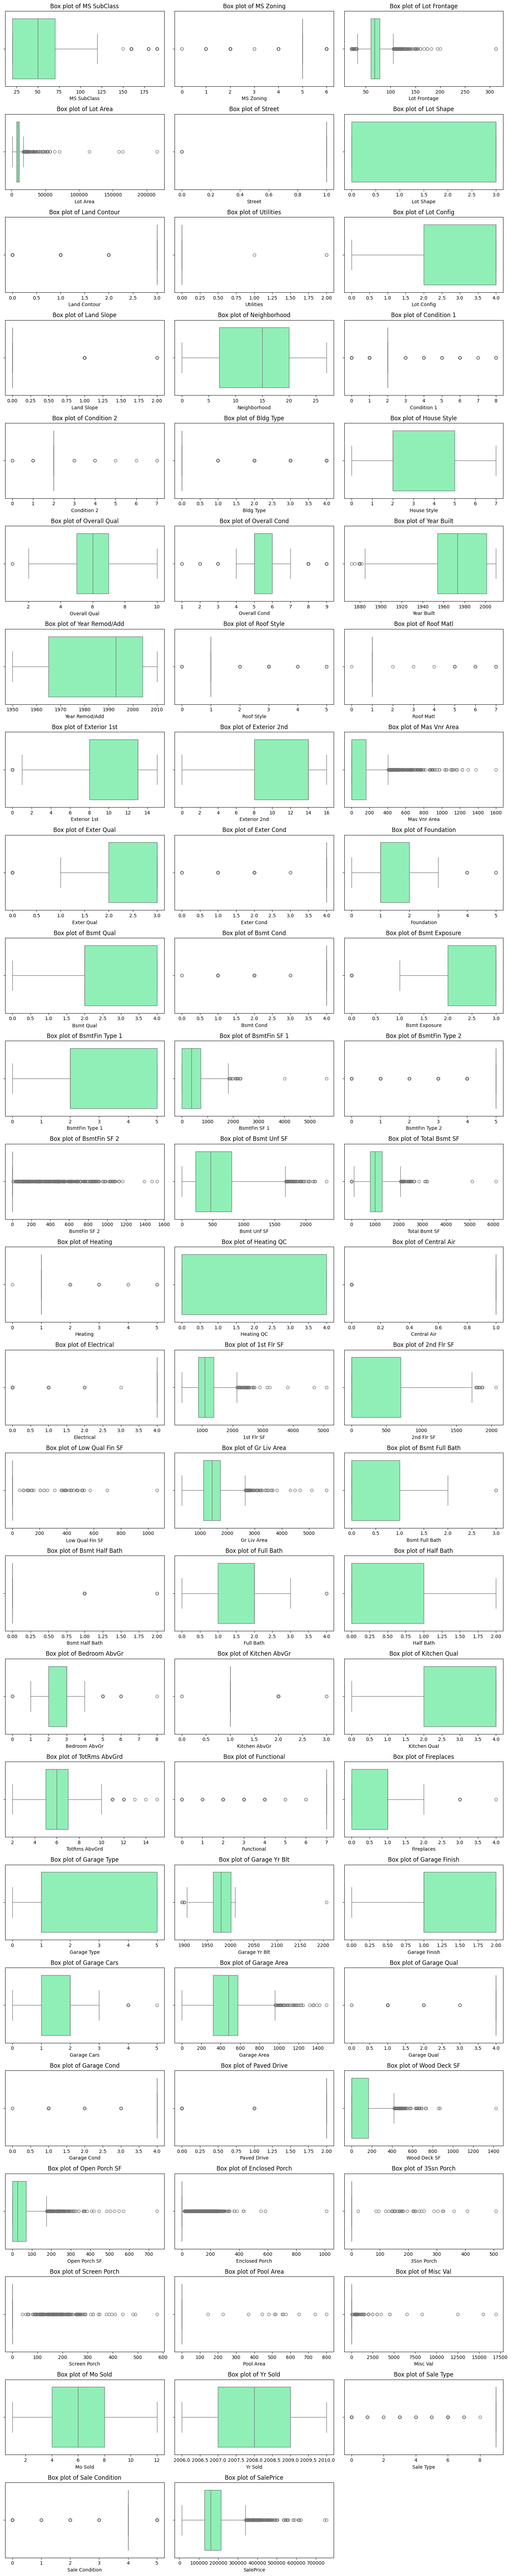

In [96]:
# Select numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns

# Set the number of columns and rows for subplots
num_cols = 3  # Number of plots per row
num_rows = (len(numerical_columns) + num_cols - 1) // num_cols

# Create a figure and axes for the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 3))

# Iterate through the numerical columns and create a box plot for each
for i, column in enumerate(numerical_columns):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col] if num_rows > 1 else axes[col]  # Handle 1-row case
    sns.boxplot(df[column], palette='rainbow', orient='h', ax=ax)
    ax.set_title('Box plot of ' + column)

# Remove empty subplots
for j in range(i + 1, num_cols * num_rows):
    fig.delaxes(axes.flatten()[j])

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

### Scaling

In [97]:
skewness_values = df[numerical_columns].apply(skew)
print("Skewness of numeric columns:")
print(skewness_values)

Skewness of numeric columns:
MS SubClass        1.356884
MS Zoning         -2.615294
Lot Frontage       1.669348
Lot Area          12.814334
Street           -15.529674
                    ...    
Mo Sold            0.192497
Yr Sold            0.134793
Sale Type         -3.323646
Sale Condition    -2.794906
SalePrice          1.742607
Length: 74, dtype: float64


Due to the **Skewennes in the data** and the presence of **Outliers** we will us **RobustScaler** which is robust to outliers and used for skewed datasets

In [98]:
robust_scaler = RobustScaler()
df_robust_scaled = robust_scaler.fit_transform(df)
df_robust_scaled = pd.DataFrame(df_robust_scaled,columns=df.columns)
df_robust_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
MS SubClass,2930.0,0.147747,0.852760,-0.600000,-0.600000,0.0,0.400000,2.800000
MS Zoning,2930.0,-0.032765,0.865652,-5.000000,0.000000,0.0,0.000000,1.000000
Lot Frontage,2930.0,0.056655,1.184801,-2.611111,-0.444444,0.0,0.555556,13.611111
Lot Area,2930.0,0.172885,1.914950,-1.977278,-0.485115,0.0,0.514885,50.014216
Street,2930.0,-0.004096,0.063876,-1.000000,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...
Mo Sold,2930.0,0.054010,0.678623,-1.250000,-0.500000,0.0,0.500000,1.500000
Yr Sold,2930.0,-0.104778,0.658306,-1.000000,-0.500000,0.0,0.500000,1.000000
Sale Type,2930.0,-0.641297,1.877433,-9.000000,0.000000,0.0,0.000000,0.000000
Sale Condition,2930.0,-0.220137,1.076299,-4.000000,0.000000,0.0,0.000000,1.000000


### Correlation

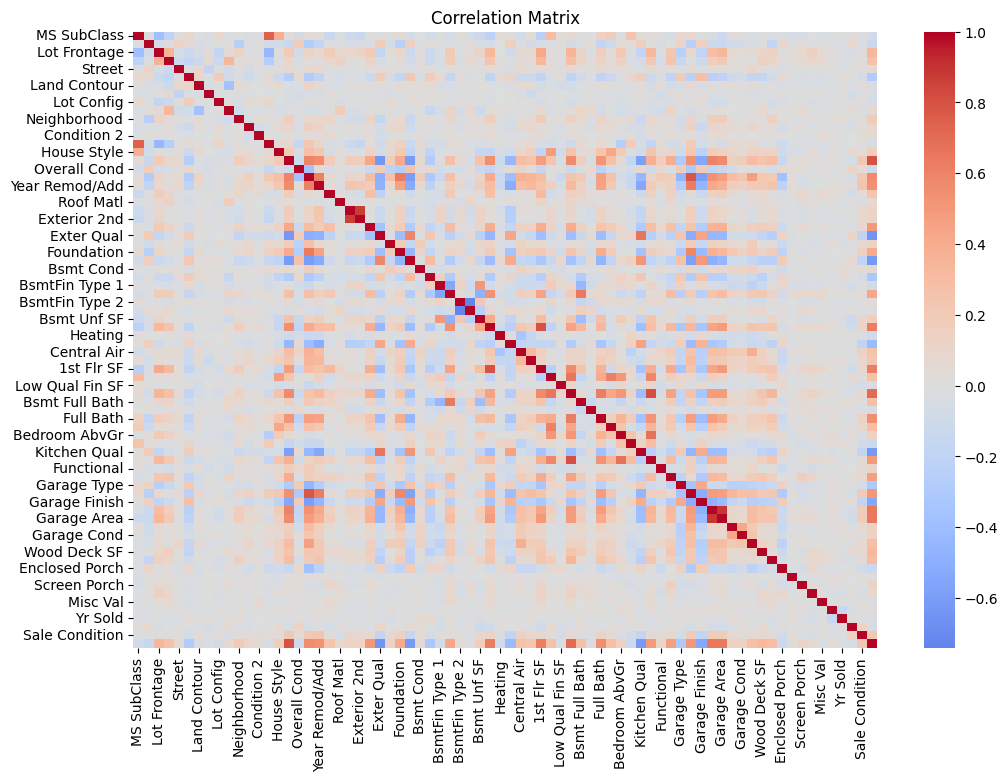

The feature with the highest correlation with the output is: Overall Qual
The correlation value is: 0.7992617947690243


In [99]:

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

# Extract the correlation values with the output variable
correlations_with_output = correlation_matrix['SalePrice'].drop('SalePrice')  # Drop the output variable itself

# Identify the feature with the highest absolute correlation with the output
most_correlated_feature = correlations_with_output.abs().idxmax()
highest_correlation_value = correlations_with_output[most_correlated_feature]

print(f"The feature with the highest correlation with the output is: {most_correlated_feature}")
print(f"The correlation value is: {highest_correlation_value}")

In [169]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Evaluate on Train data
    y_train_pred = model.predict(X_train)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_rmse = train_mse**0.5
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    print("\n>> Training Evaluation: ")
    print(f"Training MSE: {train_mse}, \nRMSE: {train_rmse}, \nMAE: {train_mae}, \nR²: {train_r2}")

    # Evaluate on Test data
    y_test_pred = model.predict(X_test)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_rmse = test_mse**0.5
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    print("\n>> Test Evaluation: ")
    print(f"Test MSE: {test_mse}, \nRMSE: {test_rmse}, \nMAE: {test_mae}, \nR²: {test_r2}")

In [170]:
X_single = df["Overall Qual"].values
y = y.reshape(-1, 1)
X_single = X_single.reshape(-1, 1)

In [171]:
X_train_single, X_test_single, y_train, y_test = train_test_split(X_single, y, train_size = 0.8)


print("X train shape:",X_train_single.shape)
print("y train shape:",y_train.shape)

print("X test shape:",X_test_single.shape)
print("y test shape:",y_test.shape)


X train shape: (2344, 1)
y train shape: (2344, 1)
X test shape: (586, 1)
y test shape: (586, 1)


### Single Linear Regression

In [172]:
lr_model = LinearRegression()
lr_model.fit(X_train_single,y_train)
evaluate_model(lr_model,X_train_single,y_train,X_test_single,y_test)


>> Training Evaluation: 
Training MSE: 2213871693.2248344, 
RMSE: 47051.79798078746, 
MAE: 33380.62354632686, 
R²: 0.6405803334521778

>> Test Evaluation: 
Test MSE: 2670171265.9173737, 
RMSE: 51673.699944143475, 
MAE: 34916.596901981844, 
R²: 0.632183903997085


### Multi Linear Regression

In [173]:
X = df.drop(columns='SalePrice').values


In [174]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)


print("X train shape:",X_train.shape)
print("y train shape:",y_train.shape)

print("X test shape:",X_test.shape)
print("y test shape:",y_test.shape)


X train shape: (2344, 73)
y train shape: (2344, 1)
X test shape: (586, 73)
y test shape: (586, 1)


In [175]:
mlr_model = LinearRegression()
mlr_model.fit(X_train,y_train)

evaluate_model(mlr_model,X_train,y_train,X_test,y_test)


>> Training Evaluation: 
Training MSE: 831723646.7232052, 
RMSE: 28839.619392828423, 
MAE: 18740.10148840648, 
R²: 0.8672795088660935

>> Test Evaluation: 
Test MSE: 1158749434.6374223, 
RMSE: 34040.40884944572, 
MAE: 20253.263863270866, 
R²: 0.8302516459942987


### Lasso and Ridge Regression

In [176]:
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
evaluate_model(lasso_model,X_train,y_train,X_test,y_test)


>> Training Evaluation: 
Training MSE: 831724474.721975, 
RMSE: 28839.63374805538, 
MAE: 18739.677574134963, 
R²: 0.8672793767399914

>> Test Evaluation: 
Test MSE: 1158822254.3857315, 
RMSE: 34041.47844006972, 
MAE: 20255.16376662523, 
R²: 0.8302409784314545


In [177]:
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
evaluate_model(ridge_model,X_train,y_train,X_test,y_test)


>> Training Evaluation: 
Training MSE: 831730507.5974258, 
RMSE: 28839.738341348137, 
MAE: 18740.125261230653, 
R²: 0.8672784140570187

>> Test Evaluation: 
Test MSE: 1159081734.1523495, 
RMSE: 34045.289456139886, 
MAE: 20256.237662239742, 
R²: 0.8302029665352114


# Best Model is the multipple linear regression